# AMES Housing Project

## Pre-Work

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#### Pull in Data

In [22]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

#### Shapes and columns

In [23]:
train.shape

(2051, 81)

In [24]:
test.shape

(878, 80)

In [25]:
numerical_train = train.select_dtypes(['number'])

In [26]:
train.select_dtypes('object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [27]:
all_train_dummies = pd.get_dummies(train, columns= train.select_dtypes('object').columns)
all_test_dummies = pd.get_dummies(test, columns= train.select_dtypes('object').columns)

In [28]:
all_train_dummies

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
2047,785,905377130,30,NaN,12342,4,5,1940,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
2048,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
Id                 878 non-null int64
PID                878 non-null int64
MS SubClass        878 non-null int64
MS Zoning          878 non-null object
Lot Frontage       718 non-null float64
Lot Area           878 non-null int64
Street             878 non-null object
Alley              58 non-null object
Lot Shape          878 non-null object
Land Contour       878 non-null object
Utilities          878 non-null object
Lot Config         878 non-null object
Land Slope         878 non-null object
Neighborhood       878 non-null object
Condition 1        878 non-null object
Condition 2        878 non-null object
Bldg Type          878 non-null object
House Style        878 non-null object
Overall Qual       878 non-null int64
Overall Cond       878 non-null int64
Year Built         878 non-null int64
Year Remod/Add     878 non-null int64
Roof Style         878 non-null object
Roof M

#### Look for good initial variables

In [30]:
top_25_corr =(train.corr()[['SalePrice']]
                   .sort_values(by='SalePrice',
                                ascending=False)
                   .head(25))

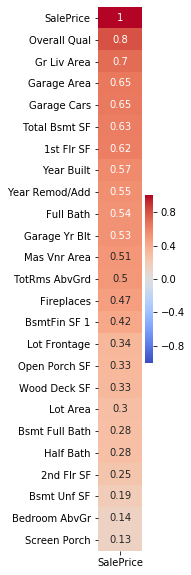

In [31]:
plt.figure(figsize=(1,10))
sns.heatmap(top_25_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1);

In [32]:
top_25_corr.index[0:12]

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area'],
      dtype='object')

In [33]:
train[top_25_corr.index[0:10]].isnull().sum()

SalePrice         0
Overall Qual      0
Gr Liv Area       0
Garage Area       1
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
dtype: int64

In [34]:
df = train[top_25_corr.index[0:10]]

In [35]:
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [36]:
df.isnull().sum()

SalePrice         0
Overall Qual      0
Gr Liv Area       0
Garage Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
dtype: int64

In [37]:
df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath
0,130500,6,1479,475.0,2.0,725.0,725,1976,2005,2
1,220000,7,2122,559.0,2.0,913.0,913,1996,1997,2
2,109000,5,1057,246.0,1.0,1057.0,1057,1953,2007,1
3,174000,5,1444,400.0,2.0,384.0,744,2006,2007,2
4,138500,6,1445,484.0,2.0,676.0,831,1900,1993,2


#### Train-Test Split

In [38]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)


## Modeling
#### Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print(cross_val_score(lr, X, y, cv=5).mean())

0.7758377868689263
0.839314366397803
0.7861179297097186


In [40]:


lr.fit(X,y)
lr.score(X,y)

0.7920501714047087

## Generate Prediction Submission


In [41]:
test_features = test[top_25_corr.index[1:10]]
test_preds = lr.predict(test_features)

In [42]:
# df2 = pd.DataFrame({
#     'Id':test['Id'],
#     'SalePrice': test_preds
# })

In [43]:
# df2.to_csv('sample_predictions.csv', index=False)

## Finding my ideal prediction values

In [44]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [45]:
def kleaning(x_data):
    preclean = x_data.select_dtypes(['number']) # .drop('SalePrice',axis=1)   # Done initially should split afterwards for reusability purposes
    # preclean.isnull().sum()       # In case these need to be changed in later models
    try: 
        dropped_clean = preclean.drop(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area'], axis=1)
    except:
        dropped_clean = preclean
    filled = pd.DataFrame(columns= dropped_clean.columns)
    for column in dropped_clean.columns:
        filled[column] = dropped_clean[column].fillna(dropped_clean[column].mean()) 
    return filled

def polly(x_data):
    # Clean Data using kleaning method
    klean_train = kleaning(x_data)
    # Split the X and y.
    try:
        klean_X = klean_train.drop('SalePrice', axis=1)
        
    except:
        klean_X = klean_train
    # klean_y = klean_train['SalePrice']
    
    # Instantiate PolyNomial
    poly = PolynomialFeatures(include_bias=False)
    
    # fit polynomial
    poly.fit_transform(klean_X)
    poly_klean_data = poly.transform(klean_X)
    
    # Generate return DataFrame
    poly_klean_X = pd.DataFrame(poly_klean_data, columns=poly.get_feature_names(klean_X.columns))
    
    return poly_klean_X

In [46]:
poly_klean_test_X = polly(all_test_dummies)
poly_klean_X = polly(all_train_dummies)
ss = StandardScaler()
ss_poly_klean_X = ss.fit_transform(poly_klean_X)
ss_poly_klean_test = ss.fit_transform(poly_klean_test_X)

#### Finding the most correlated values after polynomial

In [ ]:
pre_corr_data = pd.merge(right=poly_klean_X,
                        left=train,
                        copy=False)
klean_corr =  pre_corr_data.corr()
top_25_corr = (klean_corr[['SalePrice']]
                    .sort_values(by='SalePrice',
                                ascending=False)
                    .head(100))
neg_25_corr = (klean_corr[['SalePrice']]
                    .sort_values(by='SalePrice',
                                ascending=True)
                    .head(25))

In [ ]:
plt.figure(figsize=(1,10))
sns.heatmap(top_25_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1);

# currently here

In [ ]:
lr = LinearRegression()
lr.fit(formodel_poly_X, y)
print(cross_val_score(lr, formodel_poly_X, y, cv=5).mean())

    predicts_poly = lr.predict()
predicts_poly.head()

In [ ]:
# df3 = pd.DataFrame({
#     'Id':test['Id'],
#     'SalePrice': predicts_poly
# })
# df3.to_csv('test2_predictions.csv', index=False)

In [ ]:
poly = PolynomialFeatures(include_bias=False)

X_train_poly = kleaning(X)z

poly.fit_transform(X_train_poly)

X_train_poly_data = poly.transform(X_train_poly)
poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(filled.columns))

In [54]:
poly_df.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2',
       ...
       'Pool Area^2', 'Pool Area Misc Val', 'Pool Area Mo Sold',
       'Pool Area Yr Sold', 'Misc Val^2', 'Misc Val Mo Sold',
       'Misc Val Yr Sold', 'Mo Sold^2', 'Mo Sold Yr Sold', 'Yr Sold^2'],
      dtype='object', length=665)

In [1]:
train_all_pf = pd.merge(right=y, left=poly_df, on=['Id'])
sns.heatmap(train_all_pf)

NameError: name 'pd' is not defined